# Step by Step guide on How to Plot C chart

U chart is a control chart of Attribute data, it is used to monitor number of Non Conforming items per unit, C chart is used when you're considering a fixed sample size across all subgroup, for Example, If a hospital wants to know the number of new patients who already contract a particular before diagnosing them,and they wish to Examine only 50 patients daily.

In [1]:
#Importing required package
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

Let's generate a random sample of 50 observations.

In [2]:
#creating an empty list
no_of_nonconform = []
#creating an empty list 
sample_num = []
count = 1
for i in range(0,50):
    no_of_nonconform.append(random.randint(2,22))
    sample_num.append(count)
    count+=1
#Creating the dataframe
df = pd.DataFrame({'sample_num' : sample_num,'no_of_nonconform':no_of_nonconform})
df

,sample_num,no_of_nonconform
0,1,20
1,2,13
2,3,13
3,4,17
4,5,20
5,6,15
6,7,13
7,8,4
8,9,9
9,10,14


To calculate for c_bar, we say:

c_bar = C1+ c2+...+Cm/m

where C is the number for Non Conforming items.

m is the total sample number

In [3]:
c_bar = df.no_of_nonconform.sum()/df.sample_num.max()

# Next, we need to Obtain the control limits for C chart:

UCL = c_bar + 3(squareroot(c_bar))

LCL = c_bar - 3(squareroot(c_bar))

CL = c_bar

In [4]:
UCL = c_bar + (3* np.sqrt(c_bar))
LCL = c_bar - (3* np.sqrt(c_bar))
CL = c_bar
print('UCL is:',UCL)
print('LCL is:',LCL)
print('CL is:',CL)

UCL is: 22.564137111317525
LCL is: 1.6758628886824738
CL is: 12.12


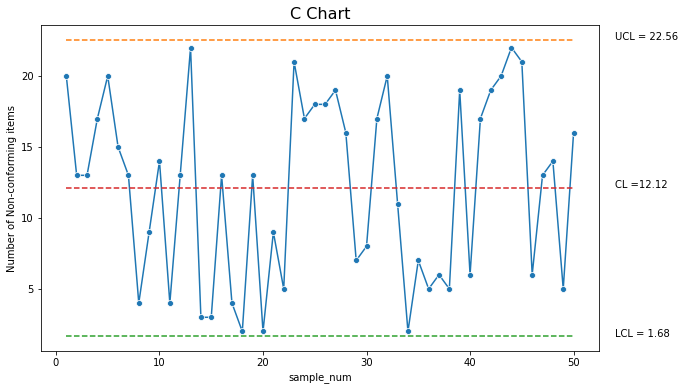

In [5]:
plt.figure(figsize = [10,6])
sns.lineplot(data = df, x = 'sample_num', y = 'no_of_nonconform', marker = 'o')
sns.lineplot(data = df, x = 'sample_num', y = UCL,linestyle = 'dashed')
sns.lineplot(data = df, x = 'sample_num', y =  LCL,linestyle = 'dashed')
sns.lineplot(data = df, x = 'sample_num', y = CL,linestyle = 'dashed')
plt.text(df.sample_num.max() + 4,LCL, 'LCL = ' + str(round(LCL,2)))
plt.text(df.sample_num.max() + 4,UCL,'UCL = ' + str(round(UCL,2)))
plt.text(df.sample_num.max() + 4,CL,'CL =' + str(round(CL,2)))
plt.title('C Chart',fontsize = 16);
plt.ylabel('Number of Non-conforming items')
plt.show()